In [4]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

In [5]:
env = Maze()

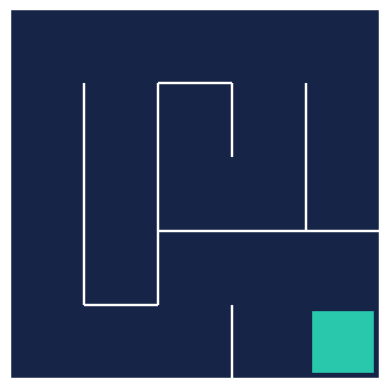

In [6]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [7]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


# Define the policy $\pi(\cdot|s)$

In [8]:
policy_probs = np.full((5, 5, 4), 0.25)

In [9]:
def policy(state):
    return policy_probs[state]

Test the policy with state (0,0)

In [10]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


In [ ]:
See how the random policy does the maze

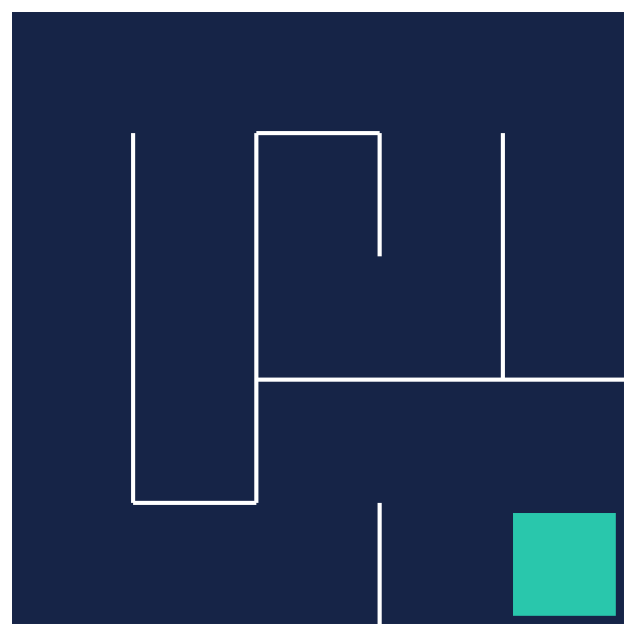

In [11]:
test_agent(env, policy, episodes=1)

Plot the policy

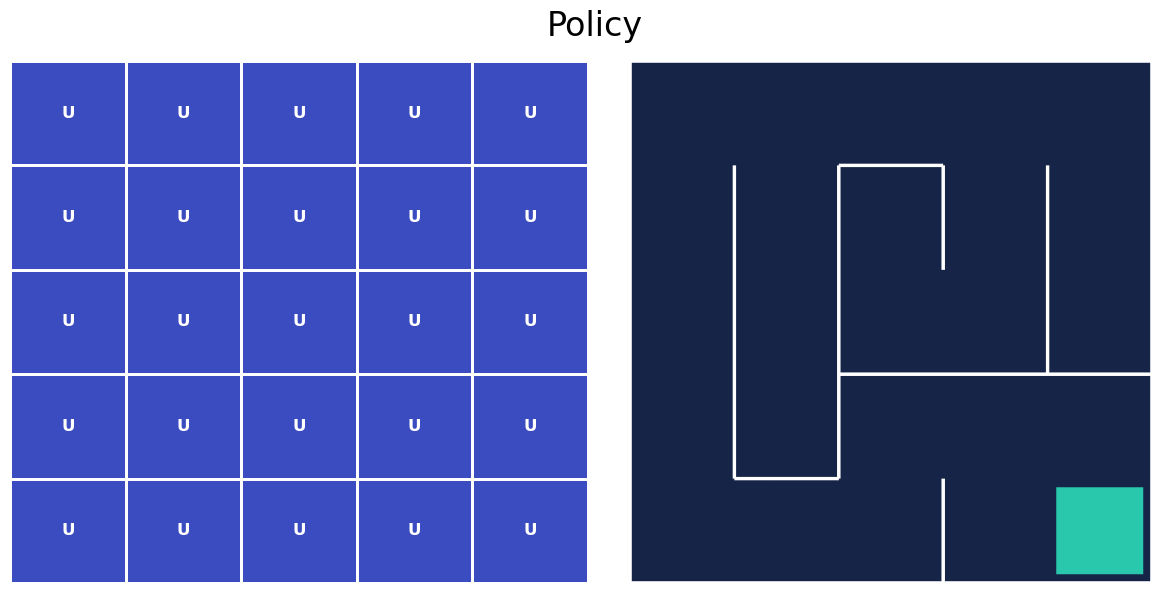

In [12]:
plot_policy(policy_probs, frame)

In [13]:
state_values = np.zeros(shape=(5,5))

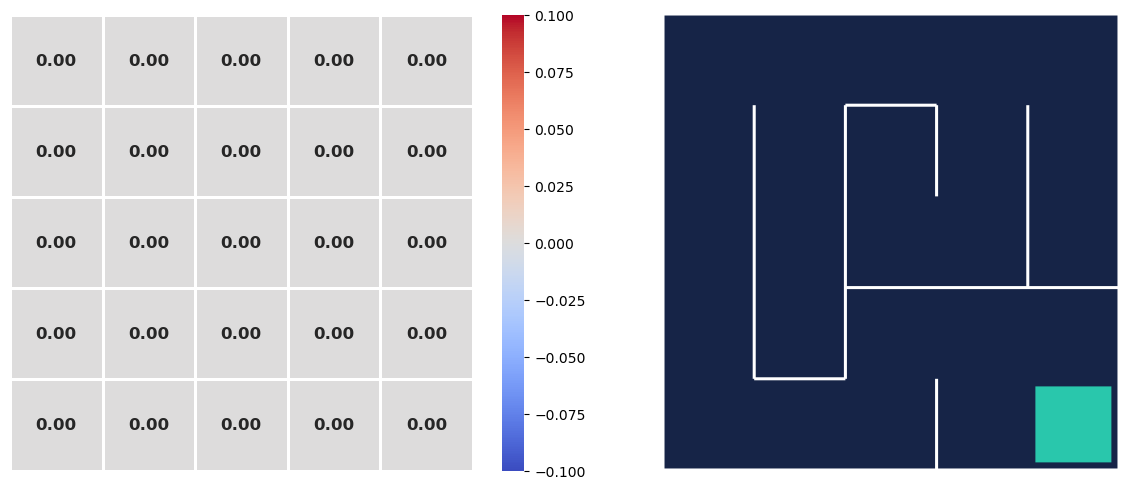

In [14]:
plot_values(state_values, frame)

In [15]:
def policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")
    
    while delta > theta:
        delta = 0
        
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                new_value = 0
                action_probabilities = policy_probs[(row, col)]
                
                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    new_value += prob * (reward + gamma * state_values[next_state])
                    
                state_values[(row, col)] = new_value
                    
                delta = max(delta, abs(old_value - new_value))


In [16]:
def policy_improvement(policy_probs, state_values, gamma=0.99):
    
    policy_stable = True
    for row in range(5):
        for col in range(5):
            old_action = policy_probs[(row, col)].argmax()
            
            new_action = None
            max_qsa = float("-inf")
            
            for action in range(4):
                next_state, reward, _, _ = env.simulate_step((row, col), action)
                qsa = reward + gamma * state_values[next_state]
                if qsa > max_qsa:
                    max_qsa = qsa
                    new_action = action
                    
            action_probs = np.zeros(4)
            action_probs[new_action] = 1.
            policy_probs[(row, col)] = action_probs

            if new_action != old_action:
                policy_stable = False

    return policy_stable    

In [ ]:
def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    policy_stable = False
    
    while not policy_stable:
        
        policy_evaluation(policy_probs, state_values, theta, gamma)
        
        policy_stable = policy_improvement(policy_probs, state_values, gamma)


In [ ]:
policy_iteration(policy_probs, state_values)

In [ ]:
plot_values(state_values, frame)

In [ ]:
plot_policy(policy_probs, frame)

In [ ]:
test_agent(env, policy)